<a href="https://colab.research.google.com/github/Snehalwadile/Time-Series-Model/blob/main/Time%20series-%20Decomposing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decomposing the above timeseries into 4 components

Please upload MSFT_Historical_Data.csv


Saving MSFT_Historical_Data.csv to MSFT_Historical_Data.csv


<ipython-input-1-ac093de34ab0>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Close'].resample('M').mean()


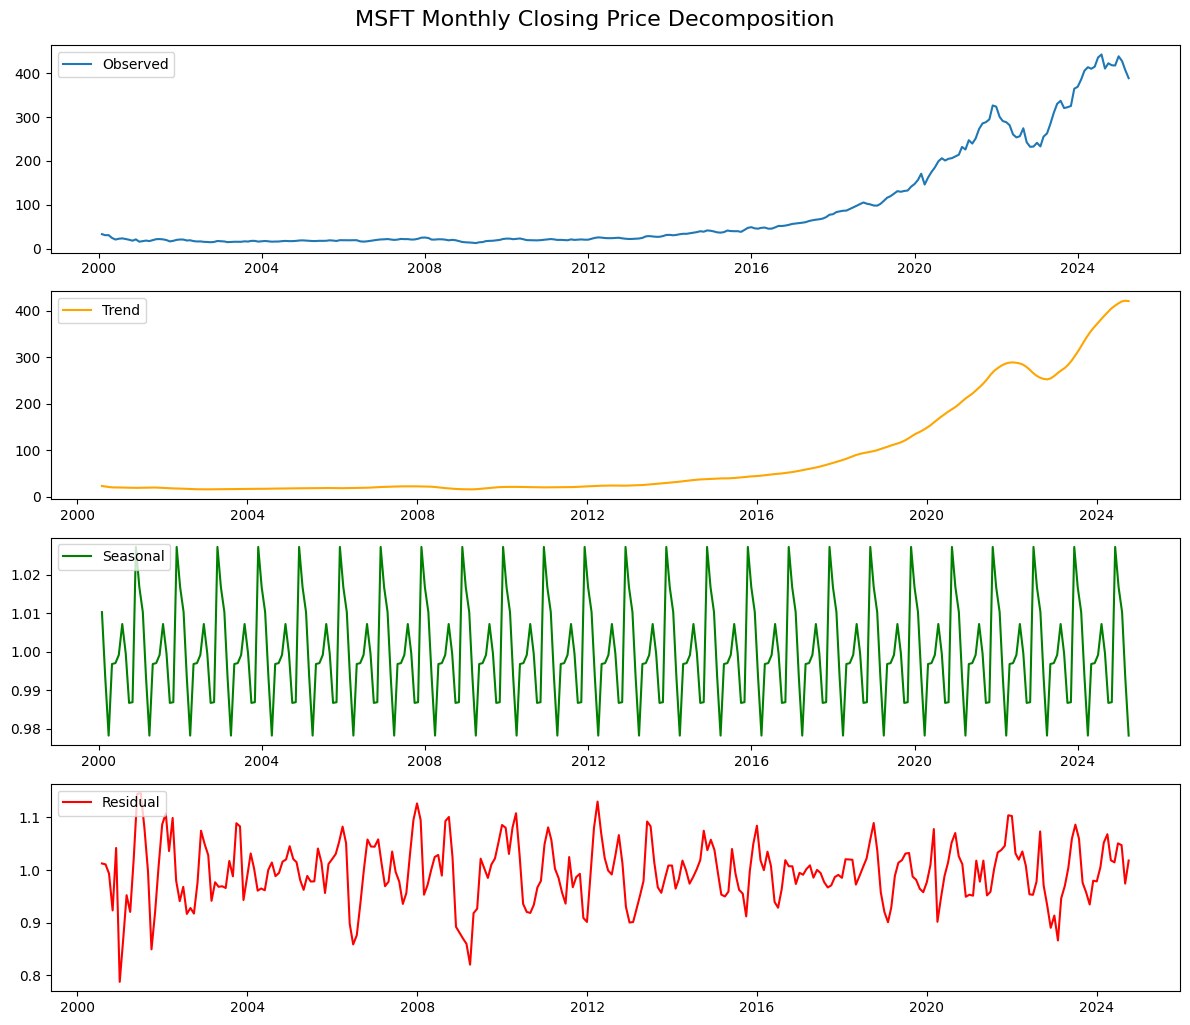

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files

# 1. Upload the file
print("Please upload MSFT_Historical_Data.csv")
uploaded = files.upload()

# 2. Load CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, parse_dates=['Date'])
df = df[['Date', 'Close']].dropna()
df.set_index('Date', inplace=True)

# 3. Resample daily data to monthly average to highlight trend/seasonality
monthly_df = df['Close'].resample('M').mean()

# 4. Decompose the time series
decomposition = seasonal_decompose(monthly_df, model='multiplicative', period=12)

# 5. Plot the components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.suptitle("MSFT Monthly Closing Price Decomposition", fontsize=16, y=1.02)
plt.show()